In [1]:
import sys
sys.path.append("experiments/")

In [3]:
import math
import numpy as np
from lib import FastGradientMethod
from lib import SinkhornMethod
from lib import Experiments
from lib import NesterovsLinearCoupling
from lib import DualGradientDescent

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def fastgrad(C, p, q, gamma=0.1, eps=0.01, log=False):
    fgm = FastGradientMethod(gamma, n=p.shape[0], epsilon=eps, log=log)
    x, iterations_num = fgm.fit(C, p, q)
    return x, iterations_num, 0

def coupling(C, p, q, gamma=0.1, eps=0.01, log=False):
    fgm = NesterovsLinearCoupling(gamma, n=p.shape[0], epsilon=eps, log=log)
    x, iterations_num = fgm.fit(C, p, q)
    return x, iterations_num, 0

def sinkhorn(C, p, q, gamma=0.1, eps=0.01, log=False):
    sm = SinkhornMethod(gamma, n=p.shape[0], epsilon=eps, log=log)
    x, inner_iterations_num, outer_iterations_num = sm.fit(C, p, q, with_prox=False)
    return x, inner_iterations_num, outer_iterations_num

def sinkhornP(C, p, q, gamma=0.1, eps=0.01, log=False):
    sm = SinkhornMethod(gamma, n=p.shape[0], epsilon=eps, log=log)
    x, inner_iterations_num, outer_iterations_num = sm.fit(C, p, q, with_prox=True)
    return x, inner_iterations_num, outer_iterations_num

def dualgrad(C, p, q, gamma=0.1, eps=0.01, log=False):
    sm = DualGradientDescent(gamma, eps, p.shape[0])
    x, inner_iterations_num = sm.fit(C, p, q)
    return x, inner_iterations_num, outer_iterations_num

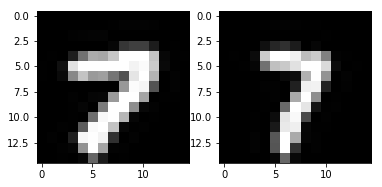

In [8]:
problems = []

for i in range(10, 20, 1):
    (C, p, q) = Experiments.load_data('experiments/test_data/1.png', 'experiments/test_data/2.png', show=i==15, size=i)
    problems.append((C, p, q))

In [ ]:
epsilons, gammas, iterations = Experiments.test([problems[0]], 
                                                config={'eps': (0.01, 0.01, 1), 
                                                        'gamma': (1, 0.05, 2)},
                                                methods=[sinkhorn,
                                                         fastgrad,
                                                         dualgrad])
epsilons = np.array(epsilons)
gammas = np.array(gammas)

  0%|          | 0/15 [00:00<?, ?it/s]

(5,) (15, 1)


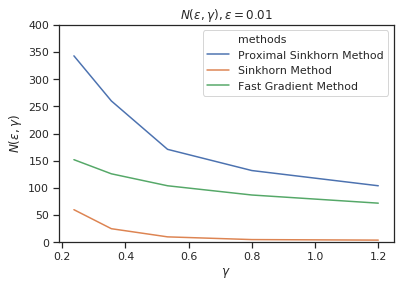

In [57]:
Experiments.plot_algorithm_comparation(gammas, iterations, 0.01, p.shape[0], ["Proximal Sinkhorn Method", "Sinkhorn Method", "Fast Gradient Method"])